<a href="https://colab.research.google.com/github/xbarto0c/MPC-MLF/blob/main/Copy_of_MPA_MLF_PCA_2_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [8]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]]); # 3 body ve 2D prostoru, s bází e1, e2 klasickou, chceme najít lepší, aproximace jednorozměrným vektorem báze, ve směru největšího rozptylu
# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3; # normalizace -> / počet bodů, matrix multiplication, X&X.T - totěž

# Calculate the SVD decomposition and new basis vectors:, we could also use eigenvector decomposition
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition, U - matrix of eigenvectors -> new basis, D - diagonal matrix(first and second eigenvalue), tells smt about importance depending on it's values
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(U,D,V);

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.matmul(np.transpose(X),u1); # souřadnice vektorů v nové bázi [xi1, xi2]
Xi2 = np.matmul(np.transpose(X),u2); # chi

Xaprox = np.matmul(u1[:,None],Xi1[None,:]); # +np.matmul(u2[:,None],Xi2[None,:]) # aproximace bodů pomocí jednorozměrného nového vektoru báze, nebo přesně i za pomocí druhého

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]] [9.95535625 0.04464375] [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]


# PCA on Iris data

In [10]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

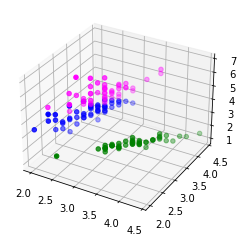

In [11]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


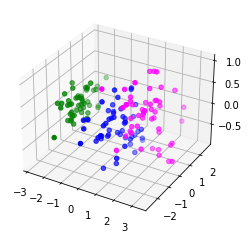

In [14]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1), odstranění střední hodnoty, nebo zajištění stejného rozptylu (0,1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
Xscaler = StandardScaler()
# Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3); # StandardScaler
pca.fit(Xpp); # fit preprocessed data
Xpca = pca.transform(Xpp); # calculate new data
print(pca.get_covariance());
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d');
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green'); # class 0
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue'); # class 1
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta'); # class 2
plt.show();


In [15]:
# Compute pca.explained_variance_ and pca.explained_variance_ratio_values
pca.explained_variance_ # nové vektory báze = principle components

array([2.93808505, 0.9201649 , 0.14774182])

In [16]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

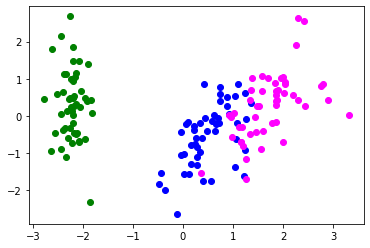

In [19]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green');
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue');
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta');

# KNN classifier

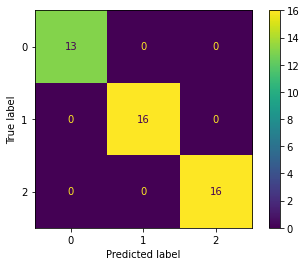

In [24]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# KNN -> k-nearest neighbours - hledání nejbližších bodů (Euclidian distance, Manhattan - hledání vzdáleností pouze na osách x a y)-> je potřeba označit data 
# x Kmeans je bez kontroly, hledá clustery, není třeba označit data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3); # rozdělení det na testovací a trénovací
knn1=KNeighborsClassifier(n_neighbors = 3) # inicializace KNN, počet sousedů
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix - předpověď = pravda, nuly mimo hlavní diagonálu
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



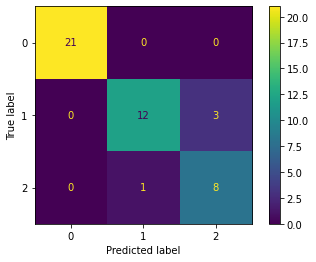

In [49]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,0:2],y,test_size=0.3); # rozdělení det na testovací a trénovací
knn1=KNeighborsClassifier(n_neighbors = 3) # inicializace KNN, počet sousedů
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix - předpověď = pravda, nuly mimo hlavní diagonálu
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)


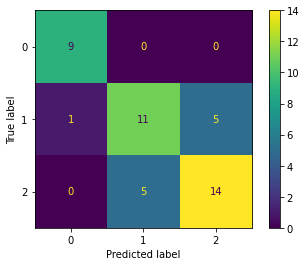

In [54]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
X_train, X_test, y_train, y_test = train_test_split(X[:,0:2],y,test_size=0.3); # rozdělení det na testovací a trénovací, pouze dva sloupce -> data nemusí jít separovat, zvýšení chybovosti
knn1=KNeighborsClassifier(n_neighbors = 3) # inicializace KNN, počet sousedů
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix - předpověď = pravda, nuly mimo hlavní diagonálu
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)